In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving college.csv to college.csv


In [ ]:
df = pd.read_csv('college.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


In [ ]:
df.describe()


,StudentID,Parent_income,IQ
count,8000.00000,8000.000000,8000.000000
mean,4000.50000,40584.017500,99.577750
std,2309.54541,18031.506468,18.923655
min,1.00000,4500.000000,60.000000
25%,2000.75000,29400.000000,90.000000
50%,4000.50000,39330.000000,100.000000
75%,6000.25000,51592.500000,110.000000
max,8000.00000,82390.000000,140.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan


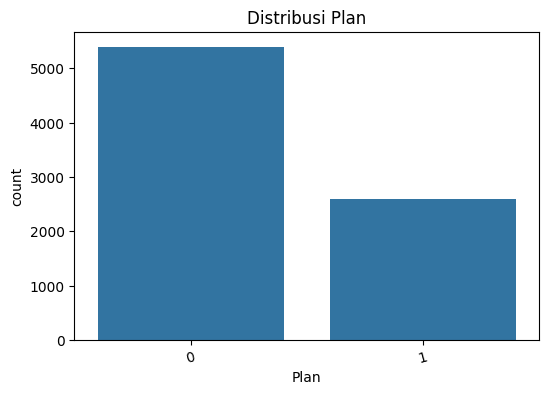

In [ ]:
plt.figure(figsize = (6, 4) )
sns.countplot(x='Plan', data=df)
plt.title('Distribusi Plan')
plt.xticks(rotation=15)
plt.show()

In [ ]:
# Remove or modify the code that references the non-existent 'college' column.
Plan_cat = df['Plan'].astype('category')
Plan_classes_names = list(Plan_cat.cat.categories) # Store original string labels in the correct order
df['Plan'] = Plan_cat.cat.codes

# Encode other categorical features
for col in ['Gender', 'Encourage']:
  if col in df.columns:
    df[col] = df[col].astype('category').cat.codes

df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,1,53900,118,0,1
1,4561,0,24900,87,1,0
2,4563,0,65800,93,1,0
3,4565,1,11440,117,0,1
4,4567,0,16700,102,1,0


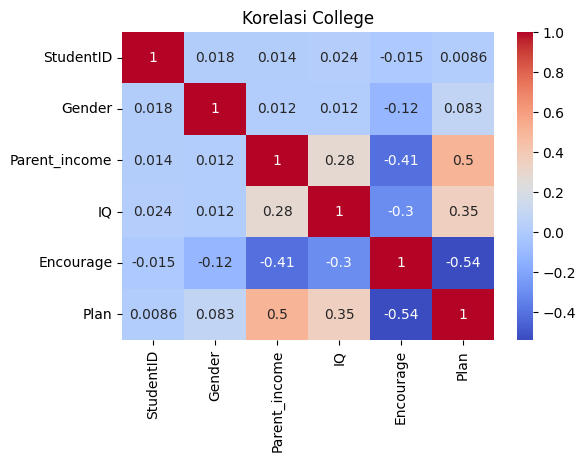

In [ ]:
plt.figure(figsize = (6, 4) )
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi College')
plt.show()

In [ ]:
df.columns

Index(['StudentID', 'Gender', 'Parent_income', 'IQ', 'Encourage', 'Plan'], dtype='object')

In [ ]:
feature_cols = ['Gender', 'Encourage','Parent_income', 'IQ']
x = df[feature_cols]
y = df['Plan']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
len(x_train), len(x_test)

(6400, 1600)

In [ ]:
from inspect import Parameter
dt = DecisionTreeClassifier(
criterion='gini',
max_depth=2,
random_state=42
)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
# Evaluasi
y_pred = dt.predict(x_test)

# Map integer predictions back to original string labels
# y_test_labels = [college_cat [i] for i in y_test]
# y_pred_labels = [college_classes_names[i] for i in y_pred]


print("Akurasi:", round(accuracy_score(y_test, y_pred) *100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred # Use the numerical labels
))

Akurasi: 81.88 %

Confusion Matrix:
 [[982  99]
 [191 328]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1081
           1       0.77      0.63      0.69       519

    accuracy                           0.82      1600
   macro avg       0.80      0.77      0.78      1600
weighted avg       0.81      0.82      0.81      1600



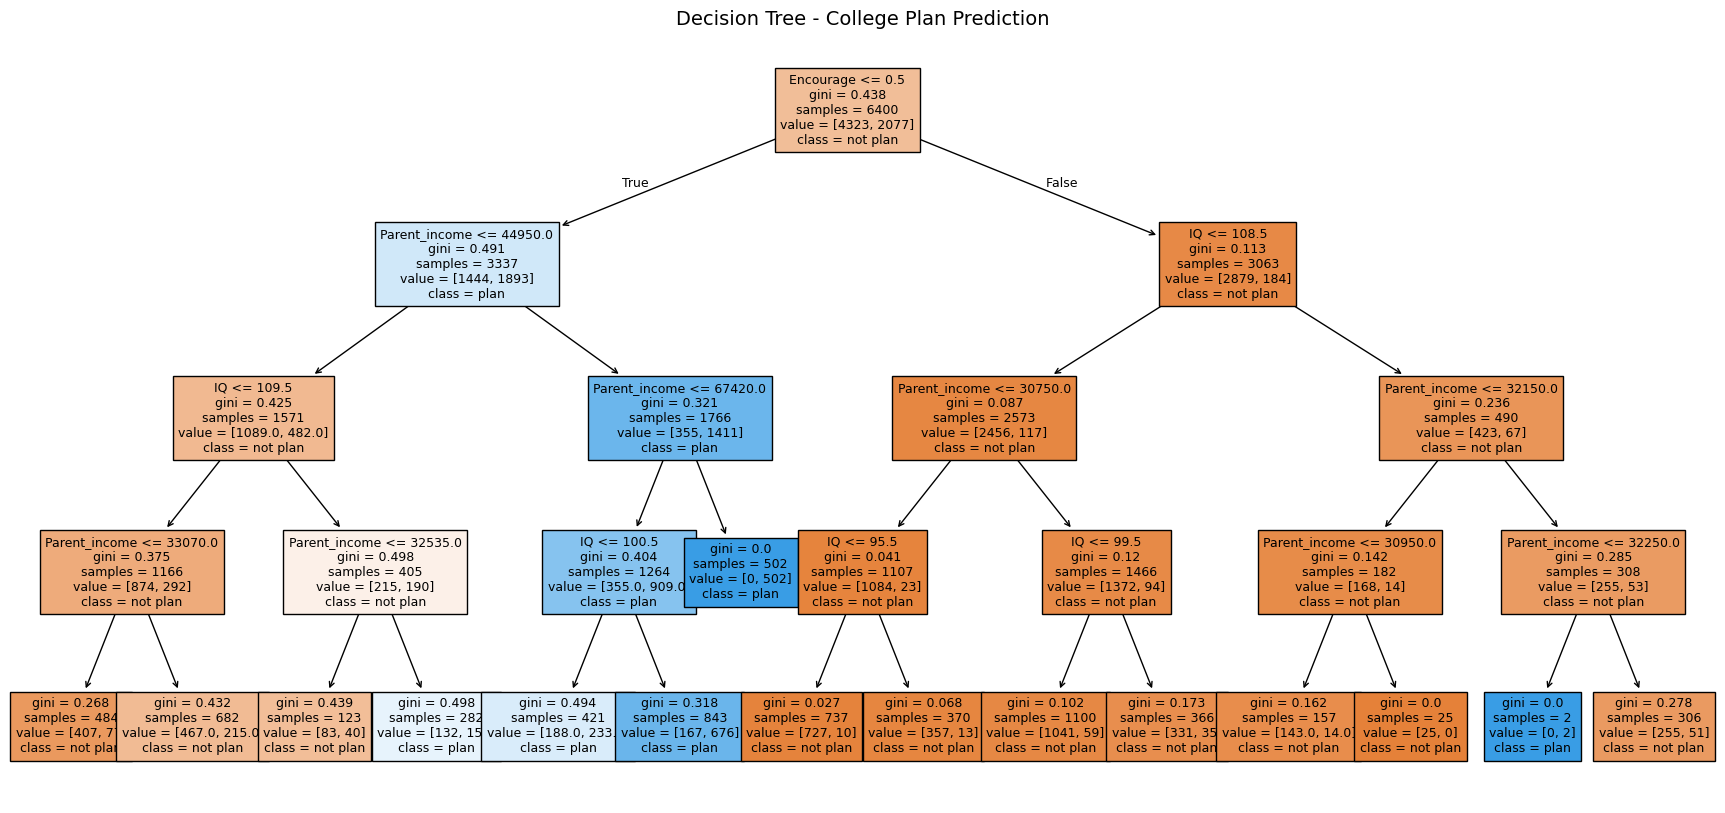

In [ ]:
# Visualisasi Decision Tree
plt.figure(figsize=(22,10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=['not plan', 'plan'],  # <--- pastikan ini string
    filled=True,
    fontsize=9
)
plt.title("Decision Tree - College Plan Prediction", fontsize=14)
plt.show()

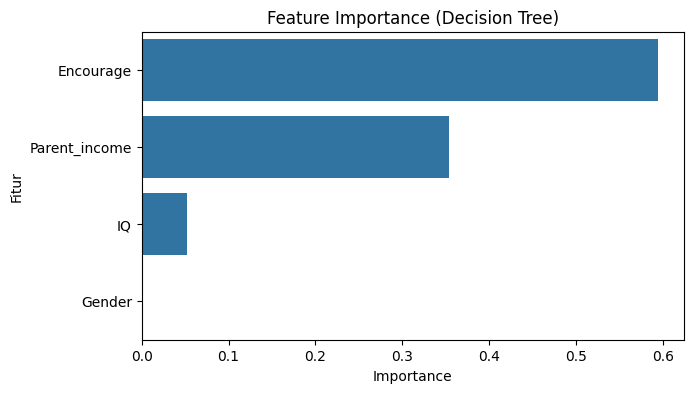

,0
Encourage,0.594873
Parent_income,0.353383
IQ,0.051744
Gender,0.000000


In [ ]:
# Fitur yang penting

imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values (ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp

In [ ]:
scores = {}
for d in range(2, nine := 9):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(x_train, y_train)
    scores [d] = accuracy_score(y_test, m.predict(x_test))
scores
best_d = max (scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores [best_d]*100,2), "%")

Best max_depth: 4 | Acc: 82.62 %
